# Тестовое задание на позицию Data Helper

# Задание 1.

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Определяем пути к файлам
predictor_path = 'predictor.dat'
faces_path = 'images/'

predictor = dlib.shape_predictor(predictor_path)
detector = dlib.get_frontal_face_detector()

In [3]:
#Строим функцию для идентификации лиц
def face_detector(image_path):

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Определяем bbox и landmarks:
    dets = detector(gray, 0)
    for k, d in enumerate(dets):
        shape = predictor(gray, d)
        top_left_point = d.tl_corner()
        bottom_right_point = d.br_corner()
        
    #Рисуем landmarks и bbox на фото:
    landmarks = []
    for i in range(0, 68):
        coord = (shape.part(i).x, shape.part(i).y)
        landmarks.append(coord)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(image, (top_left_point.x, top_left_point.y), (bottom_right_point.x, bottom_right_point.y), 
                          color=(0, 255, 0), thickness=3)
    for i in range(len(landmarks)):
        image = cv2.circle(image, landmarks[i], radius=5, color=(255, 0, 0), thickness=-1)
    
    return image

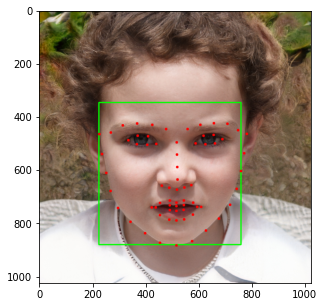

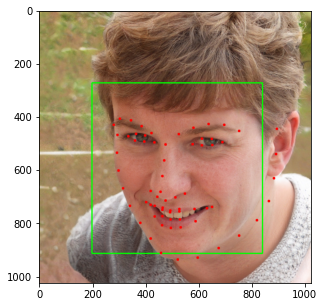

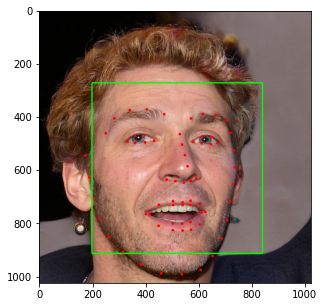

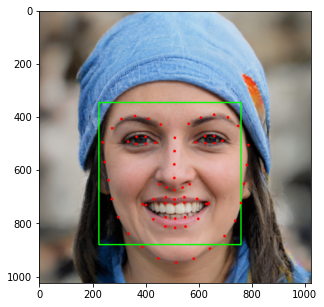

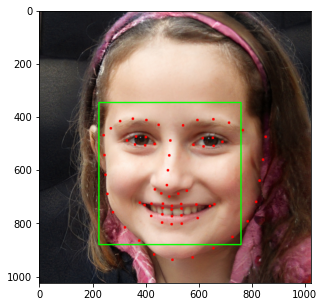

In [4]:
for i in range(1, 6):
    image = face_detector(f'{faces_path}{i}.jpg')
    plt.figure(figsize=(5,5))
    plt.imshow(image)

# Задание 2.

In [5]:
import numpy as np
import pandas as pd

In [6]:
#Будем работать, например, с training-датасетом. Я думаю, что это не принципиально

data = pd.read_csv('training.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [7]:
data.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [8]:
# Исключаем изображения с неполными данными и делаем переиндексацию
data = data.dropna()
data = data.reset_index(drop=True)

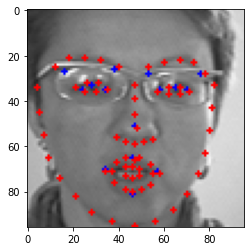

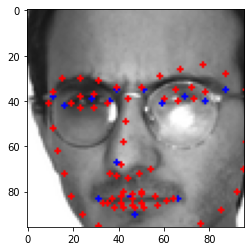

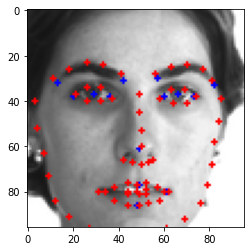

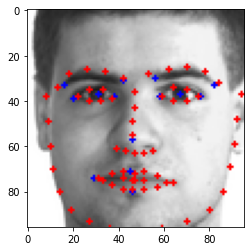

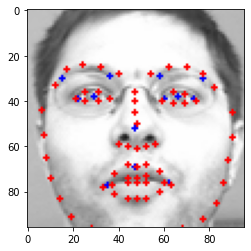

In [9]:
# Описываем функцию для получения изображения
def retrieve_image(index): 
    image = data.iloc[index].Image
    image = list(map(lambda x: int(x), image.split()))
    image = np.array(image).reshape(96, 96, 1).astype('uint8')
    
    return image

# Функцию для получения landmarks из размеченных данных
def get_csv_landmarks(index):
    csv_landmarks = []
    for i in range(15):
        csv_landmarks.append((int(data.iloc[index, 2*i]), int(data.iloc[index, 2*i + 1])))
        
    return csv_landmarks

# Функцию для детектирования 68 точек из алгоритма dlib
def get_dlib_landmarks(image):
    dets = detector(image, 0)
    if len(dets) == 0:
        return []
    shape = predictor(image, dets[0])
    
    landmarks = []
    for i in range(0, 68):
        coord = np.array((int(shape.part(i).x), int(shape.part(i).y)))
        landmarks.append(coord)
    
    return landmarks
    
# Покажем несколько случайных примеров для сравнения работы алгоритма dlib против размеченных 15-ти точек в датасете
for i in range(5):
    index = np.random.choice(len(data))
    plt.figure()
    image = retrieve_image(index)   
    csv_landmarks = get_csv_landmarks(index)
    dlib_landmarks = get_dlib_landmarks(image)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    for point in csv_landmarks:
        image = cv2.circle(image, point, radius=1, color=(0, 0, 255), thickness=-1)
    for point in dlib_landmarks:
        image = cv2.circle(image, point, radius=1, color=(255, 0, 0), thickness=-1)
        
    plt.imshow(image)
    

Сравниваемые точки: nose_tip = 31, eye_center = [38,39,41,42] или [44,45,47,48] л/п, eye_inner = 40 или 43 л/п,
eye_outer = 37 или 46 л/п, mouth_corner = 45 или 55 л/п, mouth_center = 52 или 58 в/н, eyebrow_outer = 18 или 27 л/п,
eyebrow_inner = 22 или 23 л/п.
Также учитываем, что в библиотеке dlib отсчет точек идет с 1

In [10]:
# Зададим оценку точности детектирования как бинарный ответ на расположение точек относительно друг друга
# с некоторой допустимой областью смещения:
def detection_metrics(true_coord, est_coord):
    radius = 2
    dist = abs(true_coord[0] - est_coord[0]) + abs(true_coord[1] - est_coord[1])
    
    return dist <= 2 * radius

# Зададим оценку точности позиционирования как метрику Минковского, а более конкретно - для случая r = 2.
# Соответственно, ошибка будет измеряться как евклидово расстояние между точками алгоритма и разметки:
def position_metrics(true_coord, est_coord):
    dist = ((true_coord[0] - est_coord[0]) ** 2 + (true_coord[1] - est_coord[1]) ** 2) ** 0.5
    
    return dist

Безусловно, такие метрики являются достаточно примитивными для оценки соответствующих точностей, однако довольно сложно сразу подобрать обоснованные для конкретной задачи оценки

In [11]:
metrics_array = []
missing = []

# Формируем массив с метриками для каждого изображения
for i in range(len(data.index)):
    image = retrieve_image(i)   
    csv_landmarks = get_csv_landmarks(i)
    dlib_landmarks = get_dlib_landmarks(image)
    image_landmarks_metrics = []
    if len(dlib_landmarks) == 0:
        missing.append(i)
        continue
    image_landmarks_metrics.append(i)
    for f in [detection_metrics, position_metrics]:
        # Метрика для глаз:
        # центры
        image_landmarks_metrics.append(f(csv_landmarks[0], 
                                    (dlib_landmarks[37] + dlib_landmarks[38] + dlib_landmarks[40] + dlib_landmarks[41]) / 4)), 
        image_landmarks_metrics.append(f(csv_landmarks[1], 
                                    (dlib_landmarks[43] + dlib_landmarks[44] + dlib_landmarks[46] + dlib_landmarks[47]) / 4))
        # иннеры и аутеры
        image_landmarks_metrics.append(f(csv_landmarks[2], 
                                    dlib_landmarks[39]))
        image_landmarks_metrics.append(f(csv_landmarks[3], 
                                    dlib_landmarks[36]))
        image_landmarks_metrics.append(f(csv_landmarks[4], 
                                    dlib_landmarks[42]))
        image_landmarks_metrics.append(f(csv_landmarks[5], 
                                    dlib_landmarks[45]))
    
        # Метрика для бровей:
        # иннеры и аутеры
        image_landmarks_metrics.append(f(csv_landmarks[6], 
                                    dlib_landmarks[21]))
        image_landmarks_metrics.append(f(csv_landmarks[7], 
                                    dlib_landmarks[17]))
        image_landmarks_metrics.append(f(csv_landmarks[8], 
                                    dlib_landmarks[22]))
        image_landmarks_metrics.append(f(csv_landmarks[9], 
                                    dlib_landmarks[26]))
    
        # Метрика для носа:
        image_landmarks_metrics.append(f(csv_landmarks[10], 
                                    dlib_landmarks[30]))
    
        # Метрика для рта:
        # левый угол, правый угол, верх и низ:
        image_landmarks_metrics.append(f(csv_landmarks[11], 
                                    dlib_landmarks[44]))
        image_landmarks_metrics.append(f(csv_landmarks[12], 
                                    dlib_landmarks[54]))
        image_landmarks_metrics.append(f(csv_landmarks[13], 
                                    dlib_landmarks[51]))
        image_landmarks_metrics.append(f(csv_landmarks[14], 
                                    dlib_landmarks[57]))
        
    metrics_array.append(image_landmarks_metrics)
print(f'Missing dlib face landmarks on images {missing}')

Missing dlib face landmarks on images [72, 81, 140, 172, 415, 560, 618, 666, 824, 1368, 1512, 1592, 1680, 1684, 1705, 1726, 1730, 1750, 1767, 1770, 1801, 1811, 1832, 1842, 1843, 1850, 1852, 1853, 1861, 1864, 1866, 1877, 1885, 1894, 1899, 1944, 1978, 1979, 1982, 1984, 1997, 1998, 2005, 2032, 2054, 2060, 2088, 2089, 2090, 2107, 2116, 2124]


In [12]:
# Будем сортировать полученный массив с метриками по среднему значению оценок детектирования
# для каждого изображения
def sort_by_mean(sub_list):
    sub_list.sort(key = lambda x: x[-1])
    return sub_list

best3_indexes = []
worst3_indexes = []

# Переводим наши булевые величины в более удобный формат для вычислений
for image in metrics_array:
    bool_to_int = []
    for i in range(1, 16):
        bool_to_int.append(int(image[i]))
    mean = np.mean(bool_to_int)
    image.append(mean)
sort_by_mean(metrics_array)

for i in range(3):
    worst3_indexes.append(metrics_array[i][0])
    best3_indexes.append(metrics_array[-i-1][0])

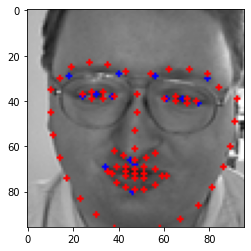

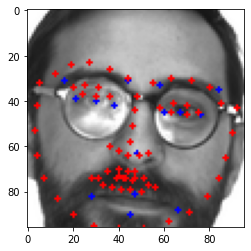

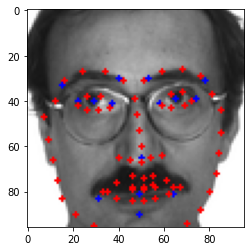

In [13]:
# Отобразим лучшие и худшие по метрике детектирования изображения:
for index in worst3_indexes:
    plt.figure()
    image = retrieve_image(index)   
    csv_landmarks = get_csv_landmarks(index)
    dlib_landmarks = get_dlib_landmarks(image)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    for point in csv_landmarks:
        image = cv2.circle(image, point, radius=1, color=(0, 0, 255), thickness=-1)
    for point in dlib_landmarks:
        image = cv2.circle(image, point, radius=1, color=(255, 0, 0), thickness=-1)
        
    plt.imshow(image)

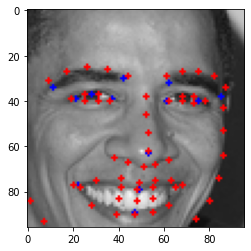

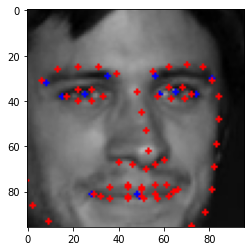

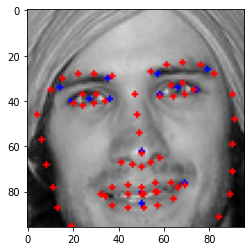

In [14]:
for index in best3_indexes:
    plt.figure()
    image = retrieve_image(index)   
    csv_landmarks = get_csv_landmarks(index)
    dlib_landmarks = get_dlib_landmarks(image)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    for point in csv_landmarks:
        image = cv2.circle(image, point, radius=1, color=(0, 0, 255), thickness=-1)
    for point in dlib_landmarks:
        image = cv2.circle(image, point, radius=1, color=(255, 0, 0), thickness=-1)
        
    plt.imshow(image)

# Задание 3.

In [15]:
import supervisely_lib as sly

In [16]:
# Создаем локальный проект на девайсе
sly.io.fs.remove_dir('./sly_project')
project_new = sly.Project('./sly_project', sly.OpenMode.CREATE)
updated_dest_meta = project_new.meta

# заполняем метаданные нужными ObjClass для каждой landmark
obj_class_names = ['left_eye_center', 'right_eye_center', 'left_eye_inner_corner', 'left_eye_outer_corner',
                   'right_eye_inner_corner', 'right_eye_outer_corner', 'left_eyebrow_inner_end', 'left_eyebrow_outer_end',
                   'right_eyebrow_inner_end', 'right_eyebrow_outer_end', 'nose_tip', 'mouth_left_corner', 'mouth_right_corner',
                   'mouth_center_top_lip', 'mouth_center_bottom_lip']
for obj in obj_class_names:
    obj = sly.ObjClass(
        name=obj,
        geometry_type=sly.Point,
        color=[255, 0, 0])
    updated_dest_meta = updated_dest_meta.add_obj_class(obj)
project_new.set_meta(updated_dest_meta)

In [17]:
# Создадим датасет и внесем в него 10 худших изображений и аннотаций к ним:
dataset = project_new.create_dataset('dataset')
worst10_indexes = []
for i in range(10):
    worst10_indexes.append(metrics_array[i][0])

In [18]:
# Описываем функцию, назначающую в лейбл аннотации необходимые координаты и класс:
def create_label(dlib_landmarks):
    dlib_15_points = [[37, 38, 40, 41], [43, 44, 46, 47], 39, 36, 42, 45, 21, 17, 22, 26, 30, 44, 54, 51, 57] # сопоставление точек из разметки с точками модели
    label = []
    for i in range(len(obj_class_names)):
        if type(dlib_15_points[i]) == list:
            x, y = (dlib_landmarks[dlib_15_points[i][0]] + dlib_landmarks[dlib_15_points[i][1]] + 
                    dlib_landmarks[dlib_15_points[i][2]] + dlib_landmarks[dlib_15_points[i][3]]) / 4
        else:
            x, y = dlib_landmarks[dlib_15_points[i]]
        coord = sly.Label(sly.Point(x, y), updated_dest_meta.obj_classes.get(obj_class_names[i]))
        label.append(coord)
    
    return label

In [19]:
# Получаем изображение и лэндмарки с помощью ранее описанных функций и заносим item в датасет
for index in worst10_indexes:
    item_name = f'image{index}.jpg'
    image = retrieve_image(index)
    dlib_landmarks = get_dlib_landmarks(image)
    ann = sly.Annotation((96, 96), create_label(dlib_landmarks))
    dataset.add_item_np(item_name, image, ann)

In [20]:
# Убеждаемся в занесении в датасет изображений и аннотаций:
import os
def print_project_files(project_dir):
    files_with_sizes = {
        filename: sly.fs.get_file_size(os.path.join(project_dir, filename))
        for filename in sly.fs.list_dir_recursively(project_dir)
        }
    files_text = '\n'.join(
        '\t{}: {} bytes'.format(filename, files_with_sizes[filename])
        for filename in sorted(files_with_sizes.keys()))
    print(f'Project contents:\n{str(files_text)}\n')

print_project_files('./sly_project')

Project contents:
	dataset/ann/image1360.jpg.json: 6295 bytes
	dataset/ann/image1372.jpg.json: 6295 bytes
	dataset/ann/image1638.jpg.json: 6295 bytes
	dataset/ann/image1706.jpg.json: 6295 bytes
	dataset/ann/image1757.jpg.json: 6295 bytes
	dataset/ann/image1765.jpg.json: 6295 bytes
	dataset/ann/image1875.jpg.json: 6294 bytes
	dataset/ann/image1890.jpg.json: 6295 bytes
	dataset/ann/image1911.jpg.json: 6295 bytes
	dataset/ann/image85.jpg.json: 6295 bytes
	dataset/img/image1360.jpg: 4899 bytes
	dataset/img/image1372.jpg: 4532 bytes
	dataset/img/image1638.jpg: 4366 bytes
	dataset/img/image1706.jpg: 4632 bytes
	dataset/img/image1757.jpg: 4434 bytes
	dataset/img/image1765.jpg: 3754 bytes
	dataset/img/image1875.jpg: 3272 bytes
	dataset/img/image1890.jpg: 4422 bytes
	dataset/img/image1911.jpg: 4156 bytes
	dataset/img/image85.jpg: 4120 bytes
	meta.json: 2854 bytes



In [21]:
# Сохраним локальный путь к проекту в переменную:
project_directory = './sly_project'

# Описываем новый проект:
team_name = "padobrik_team"
workspace_name = "onecell_challenge"
project_name = "uploaded_project"

address = 'https://app.supervise.ly/'
token = 'here should be token but I have deleted it :)'

api = sly.Api(address, token)
team = api.team.get_info_by_name(team_name)

# Код ниже частично взят из Notebooks в Supervisely
if team is None:
    raise RuntimeError("Team {!r} not found".format(team_name))

workspace = api.workspace.get_info_by_name(team.id, workspace_name)
if workspace is None:
    raise RuntimeError("Workspace {!r} not found".format(workspace_name))
    
print("Team: id={}, name={}".format(team.id, team.name))
print("Workspace: id={}, name={}".format(workspace.id, workspace.name))

# read project from directory 
project_fs = sly.Project(project_directory, sly.OpenMode.READ)

# check if project already exists. If yes - generate new free name
if api.project.exists(workspace.id, project_name):
    project_name = api.project.get_free_name(workspace.id, project_name)
    
# create remote project and set corresponding meta information
project = api.project.create(workspace.id, project_name)
api.project.update_meta(project.id, project_fs.meta.to_json())
print("Project: id={}, name={}".format(project.id, project.name))

for dataset_fs in project_fs:
    dataset = api.dataset.create(project.id, dataset_fs.name)
    
    names, img_paths, ann_paths = [], [], []
    for item_name in dataset_fs:
        img_path, ann_path = dataset_fs.get_item_paths(item_name)
        names.append(item_name)
        img_paths.append(img_path)
        ann_paths.append(ann_path)
    
    print("Dataset: {}. Will upload {} images with annotations".format(dataset.name, len(img_paths)), flush=True)
    img_infos = api.image.upload_paths(dataset.id, names, img_paths)
    image_ids = [img_info.id for img_info in img_infos]
    api.annotation.upload_paths(image_ids, ann_paths)
        
print("Project {!r} has been sucessfully uploaded".format(project_name))
print("Number of uploaded images: ", api.project.get_images_count(project.id))

Team: id=52758, name=padobrik_team
Workspace: id=61359, name=onecell_challenge
Project: id=156823, name=uploaded_project_001
Dataset: dataset. Will upload 10 images with annotations
Project 'uploaded_project_001' has been sucessfully uploaded
Number of uploaded images:  10


In [22]:
# Прикрепляю скриншоты с подтверждением создания проекта и загрузки в него датасета
from IPython.display import Image

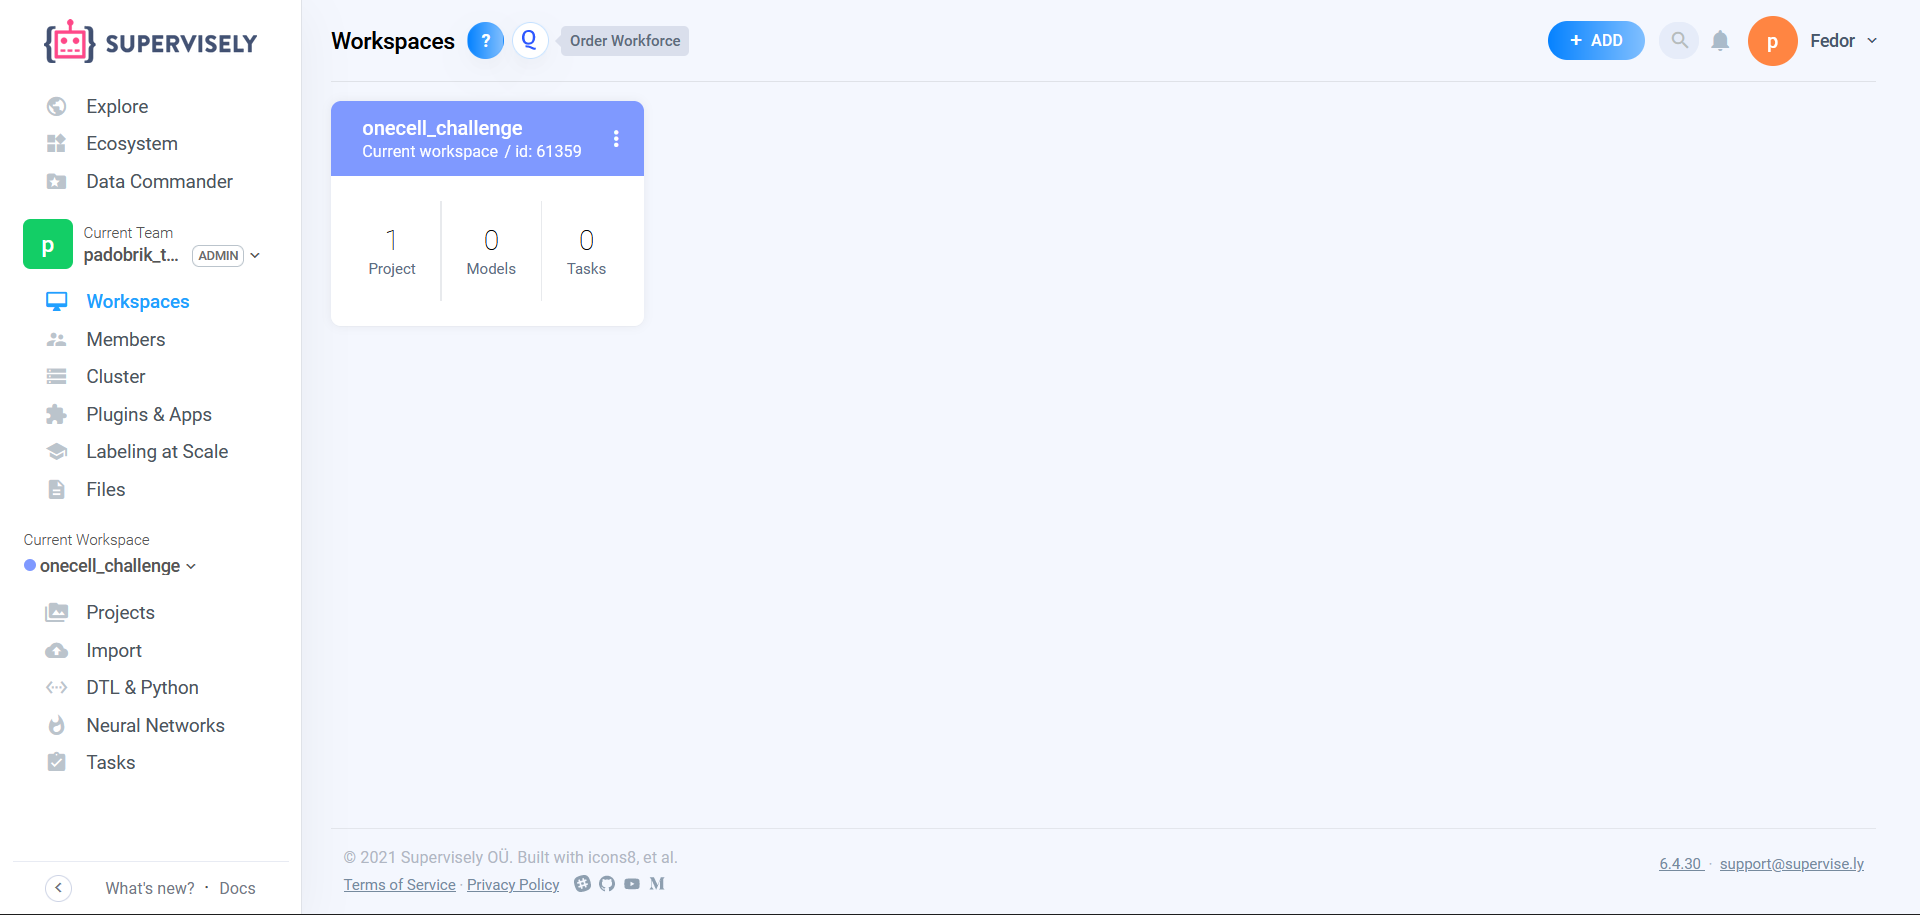

In [23]:
Image('1.png')

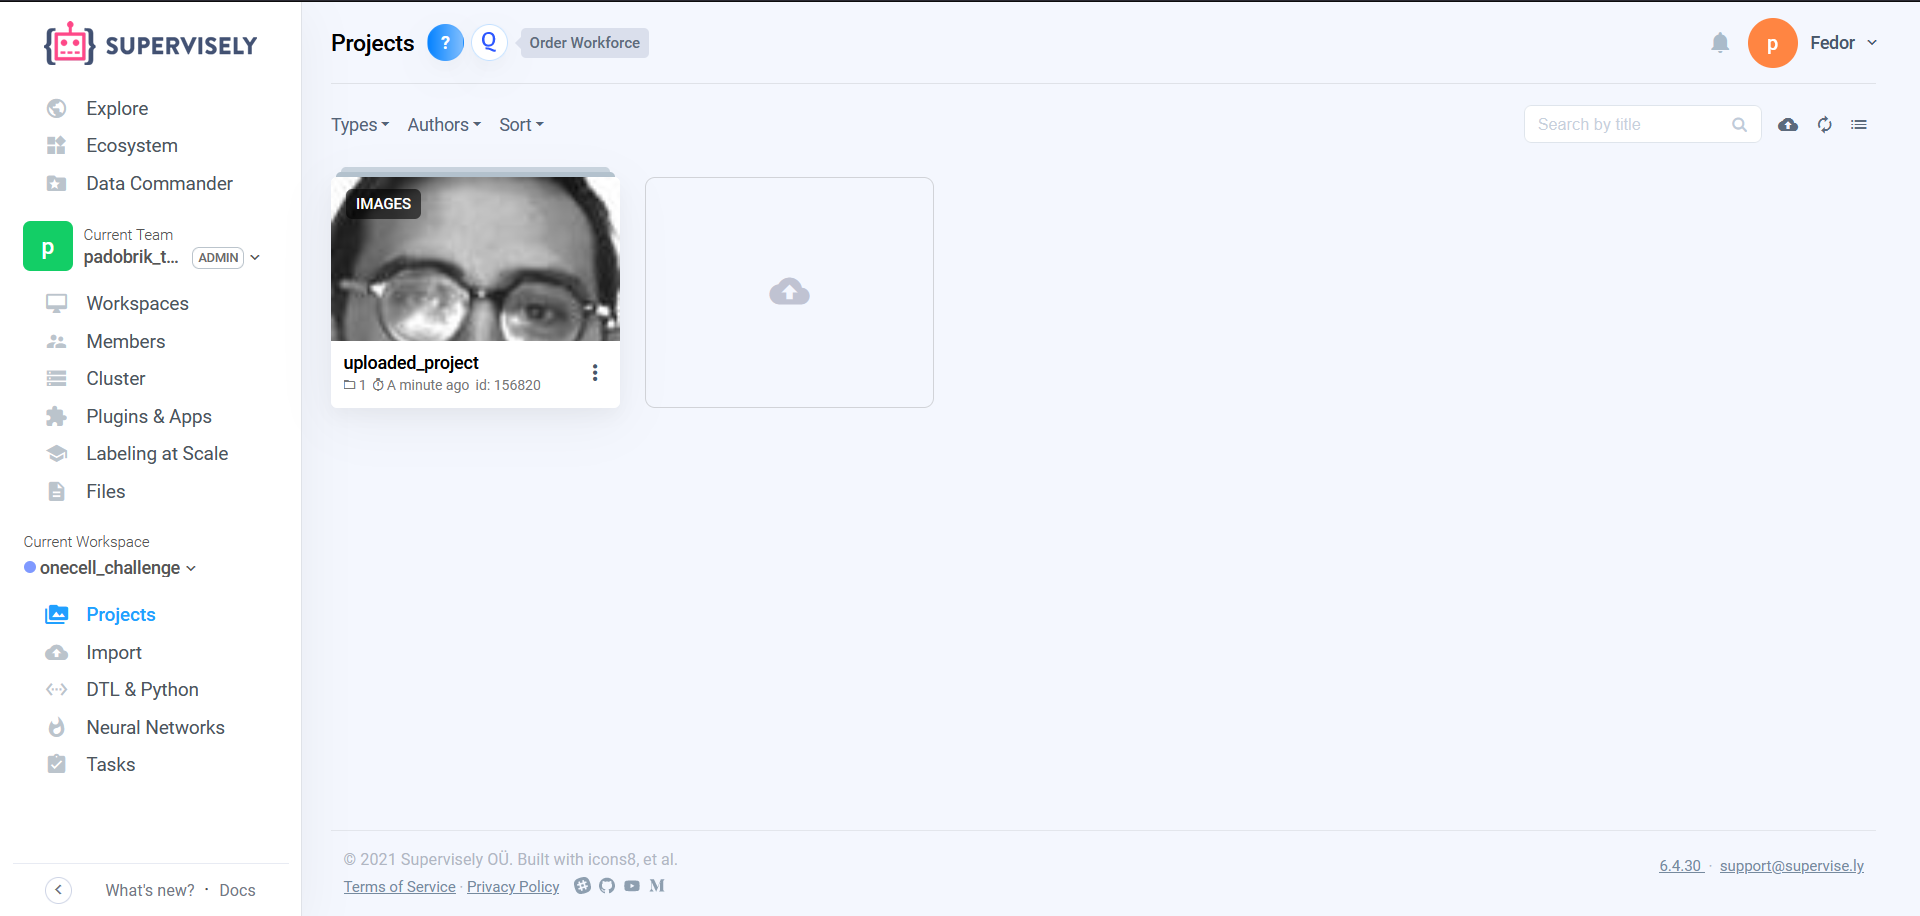

In [24]:
Image('2.png')

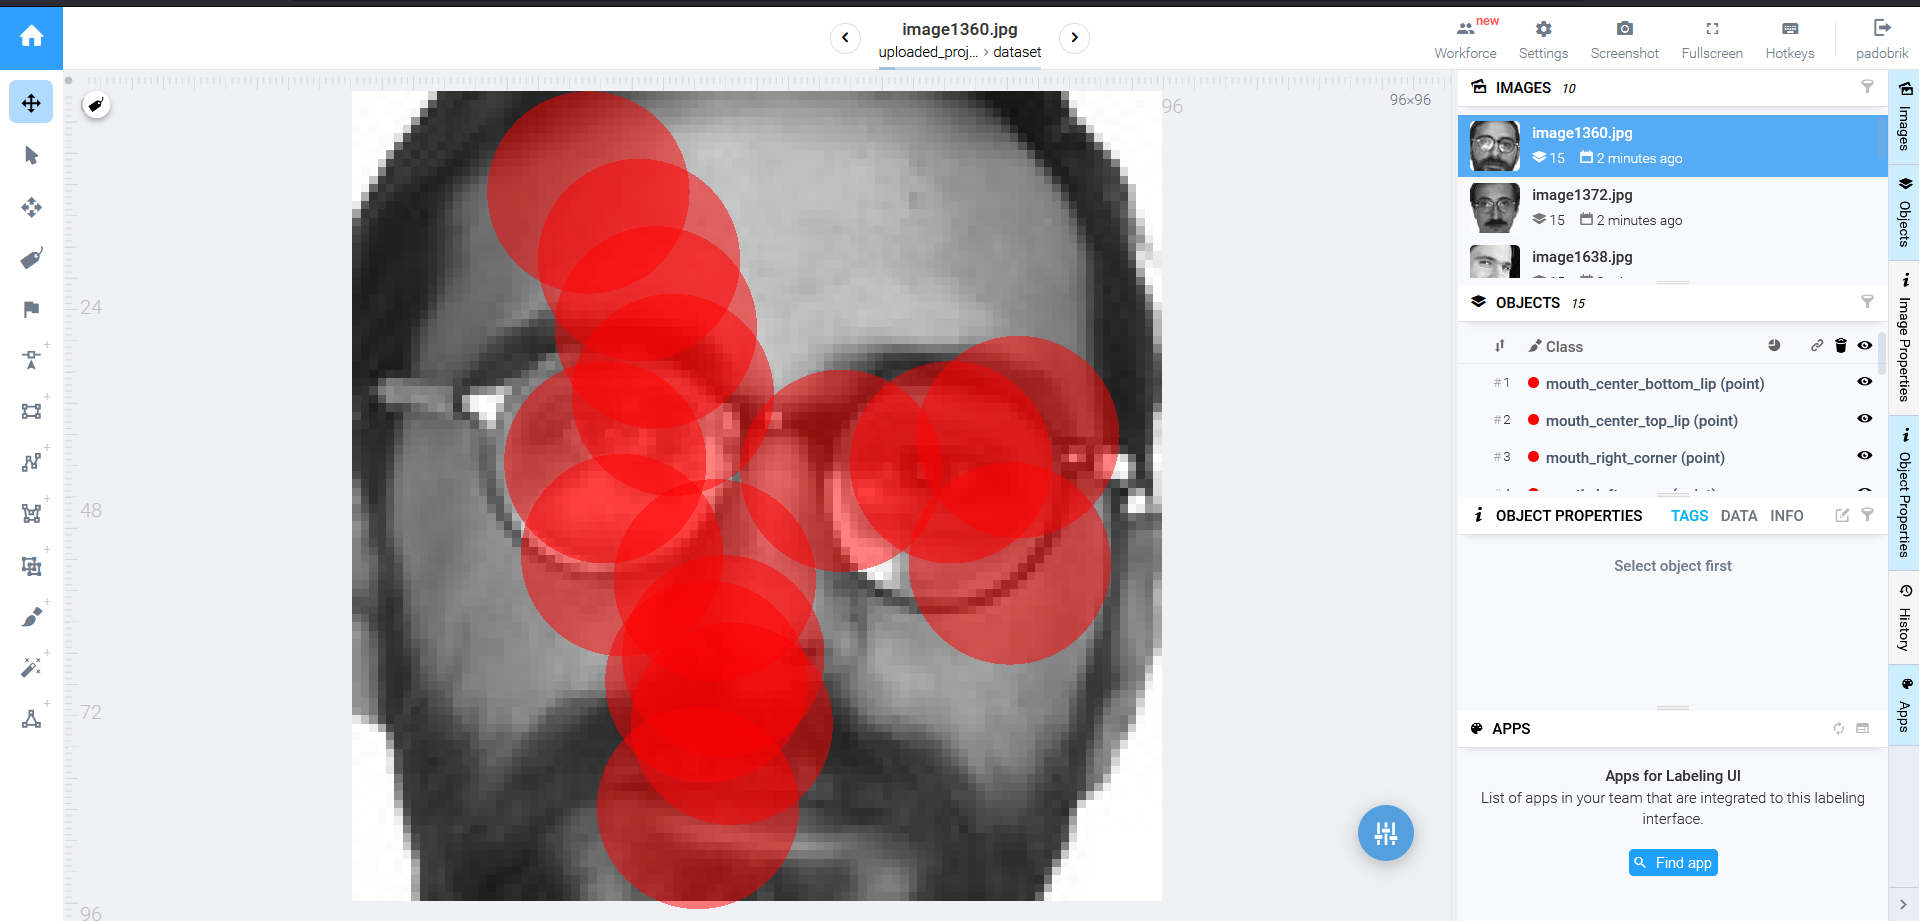

In [25]:
Image('3.png')

In [26]:
# Замеряем время разметки через supervisely путем назначения job
from datetime import datetime
import dateutil.parser

jobs = api.labeling_job.get_list(52758) # Team Id = 52758
start = datetime.timestamp(dateutil.parser.isoparse(jobs[0].started_at))
end = datetime.timestamp(dateutil.parser.isoparse(jobs[0].finished_at))
duration = (end - start)
print(f'Total time of labeling dataset of 10 photos: {int(duration)} seconds')
print(f'Estimated speed of labeling = {int(duration / 10)} sec/photo')

Total time of labeling dataset of 10 photos: 877 seconds
Estimated speed of labeling = 87 sec/photo


Говоря об оценке времени разметки с нуля и времени доразметки лэндмарков модели, попробую предположить, что основным вкладом в разность будет являться скорость создания новых точек разметки - им необходимо присвоить класс, расположить на необходимой координате. В случае же доразметки классы точкам уже присвоены и нам достаточно откорректировать работу модели.